In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS

In [3]:
##panel_238 = pd.read_csv('filtered_panel.csv')

panel_238 = pd.read_csv('panel_database238.csv')

sirens_to_remove = [439769654, 441133808, 504941337]
panel_238 = panel_238.loc[~panel_238['siren'].isin(sirens_to_remove)]

#divisions_to_remove = [62, 71, 20, 21]
#panel_238 = panel_238.loc[~panel_238['division'].isin(divisions_to_remove)]

##'''
panel_238 = panel_238.sort_values(by=["division", "siren", "annee"], ascending=True)
panel_238 = panel_238.reset_index()

n_siren = panel_238["siren"].nunique()
print(n_siren, "siren")


panel_238['CIR'] = panel_238['CIR']/1000000
panel_238['RetD'] = panel_238['CIR'].apply(lambda x: x / 0.3 if x <= 30 else (x - 25) / 0.05)
##'''

panel_238['division'] = panel_238['division'].astype(str)
panel_238['idEti'] = panel_238['idEti'].astype(str)
panel_238['brevets'] = panel_238['brevets'].astype(int)


print(panel_238.dtypes)

pd.reset_option('display.max_rows')
#pd.set_option("display.max_rows", None)

panel_238


235 siren
index                        int64
siren                        int64
division                    object
dateCreationUniteLegale      int64
annee                        int64
brevets                      int32
CIR                        float64
idEti                       object
RetD                       float64
dtype: object


,index,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD
0,0,300560588,20,1900,2016,6,0.000000,1,0.000000
1,238,300560588,20,1900,2017,3,0.368934,1,1.229780
2,476,300560588,20,1900,2018,1,0.323947,1,1.079823
3,714,300560588,20,1900,2019,0,0.000000,1,0.000000
4,952,300560588,20,1900,2020,1,0.000000,1,0.000000
...,...,...,...,...,...,...,...,...,...
1170,232,799325246,72,2013,2016,7,0.003571,0,0.011903
1171,470,799325246,72,2013,2017,5,0.003524,0,0.011747
1172,708,799325246,72,2013,2018,11,0.000000,0,0.000000
1173,946,799325246,72,2013,2019,5,0.000000,0,0.000000


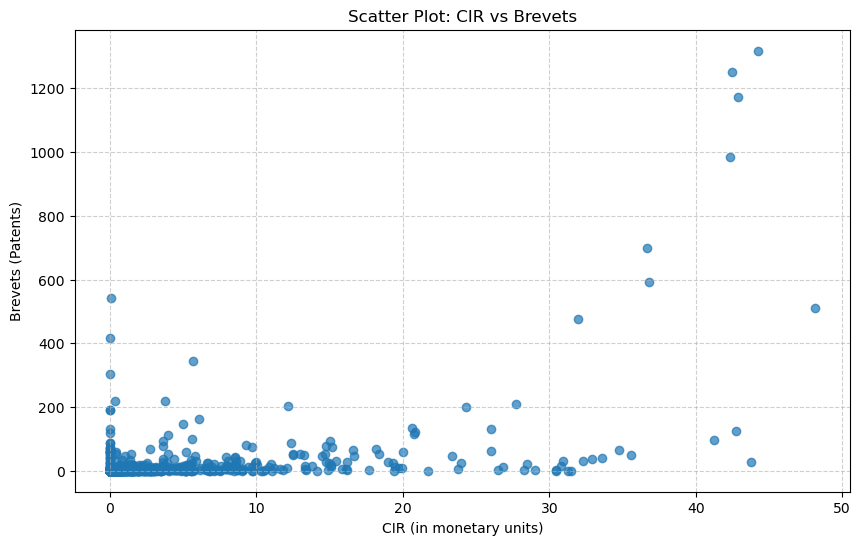

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure CIR and brevets are numeric (if needed)
panel_238['CIR'] = panel_238['CIR'].astype(float)
panel_238['brevets'] = panel_238['brevets'].astype(float)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(panel_238['CIR'], panel_238['brevets'], alpha=0.7)
plt.title('Scatter Plot: CIR vs Brevets')
plt.xlabel('CIR (in monetary units)')
plt.ylabel('Brevets (Patents)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [5]:
# STATS

num_companies = panel_238['siren'].nunique()
num_eti = panel_238.loc[panel_238['idEti'] == "1", 'siren'].nunique()
eti_percentages = (num_eti / num_companies) * 100

print("Number of companies in the sample:", num_companies)
print(f"ETI: {num_eti} ({eti_percentages:.0f}%)")
print("ETI:", (num_companies-num_eti))
print()


num_sectors = panel_238['division'].nunique()
print(f"Number of sectors: {num_sectors}")

sectors = panel_238['division'].unique()
for sector in sectors:
    # Filter companies in the current sector
    companies_in_sector = panel_238[panel_238['division'] == sector]
    
    # Count unique SIRENs for ETI (idEti == 1) and GE (idEti == 0)
    num_eti = companies_in_sector.loc[companies_in_sector['idEti'] == "1", 'siren'].nunique()
    num_ge = companies_in_sector.loc[companies_in_sector['idEti'] == "0", 'siren'].nunique()
    
    # Print results for the sector
    print(f"Sector: {sector}")
    print(f"Number of ETI: {num_eti}")
    print(f"Number of GE: {num_ge}")
    print("-" * 40)  # Separator for readability

total_cir = panel_238['CIR'].sum()
total_brevets = panel_238['brevets'].sum()

# CIR e Patentes por setor e tipo de empresa
cir_brevets_by_sector_type = panel_238.groupby(['division', 'idEti']).agg({
    'CIR': 'sum',
    'brevets': 'sum'
})

cir_brevets_by_sector_type['brevet_per_cir'] = cir_brevets_by_sector_type['brevets'] / cir_brevets_by_sector_type['CIR']
cir_brevets_by_sector_type['CIR'] = cir_brevets_by_sector_type['CIR'].apply(lambda x: f"{x:,.2f}")
cir_brevets_by_sector_type['brevet_per_cir'] = cir_brevets_by_sector_type['brevet_per_cir'].apply(lambda x: f"{x:,.2f}")

# Resultados


print(f"\nMontante total de CIR recebido: {total_cir:,.2f}")
print(f"Soma total de patentes: {total_brevets:,.2f}")
print("\nCIR e Patentes por setor e tipo de empresa (ETI e GE):")
cir_brevets_by_sector_type

Number of companies in the sample: 235
ETI: 161 (69%)
ETI: 74

Number of sectors: 11
Sector: 20
Number of ETI: 22
Number of GE: 11
----------------------------------------
Sector: 21
Number of ETI: 10
Number of GE: 3
----------------------------------------
Sector: 22
Number of ETI: 24
Number of GE: 1
----------------------------------------
Sector: 25
Number of ETI: 23
Number of GE: 3
----------------------------------------
Sector: 26
Number of ETI: 15
Number of GE: 7
----------------------------------------
Sector: 29
Number of ETI: 14
Number of GE: 12
----------------------------------------
Sector: 30
Number of ETI: 5
Number of GE: 10
----------------------------------------
Sector: 32
Number of ETI: 11
Number of GE: 1
----------------------------------------
Sector: 62
Number of ETI: 6
Number of GE: 6
----------------------------------------
Sector: 71
Number of ETI: 23
Number of GE: 12
----------------------------------------
Sector: 72
Number of ETI: 8
Number of GE: 8
---------

CIR  brevets brevet_per_cir
division idEti                                
20       0      417.80   1069.0           2.56
         1      135.69    252.0           1.86
21       0       52.09     16.0           0.31
         1      142.30    114.0           0.80
22       0        0.36      1.0           2.79
         1       67.51    372.0           5.51
25       0       63.48     66.0           1.04
         1       32.72     98.0           2.99
26       0      560.18   1415.0           2.53
         1       88.35    150.0           1.70
29       0      528.26   7533.0          14.26
         1       78.06    264.0           3.38
30       0      342.34   4893.0          14.29
         1       17.37     30.0           1.73
32       0        0.22      1.0           4.62
         1       34.74    193.0           5.56
62       0       39.28     18.0           0.46
         1       52.36     47.0           0.90
71       0       82.75     64.0           0.77
         1      106.00    482.0           4.55
72       0      339.77    971.0           2.86
         1       68.84     25.0           0.36

In [6]:
model = smf.ols('np.log(1+brevets) ~ 1+ RetD*C(division, Treatment("72"))+ C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale', data=panel_238)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(1 + brevets)   R-squared:                       0.431
Model:                             OLS   Adj. R-squared:                  0.418
Method:                  Least Squares   F-statistic:                     32.18
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):          2.07e-120
Time:                         15:57:20   Log-Likelihood:                -1697.0
No. Observations:                 1175   AIC:                             3450.
Df Residuals:                     1147   BIC:                             3592.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [7]:
from tabulate import tabulate
# Extraire les coefficients, les erreurs standards, les valeurs t et p
# Extraire uniquement certains coefficients
summary_data = [
    ("Dependent Variable", result.model.endog_names),
    ("R-squared", f"{result.rsquared:.3f}"),
    ("Adjusted R-squared", f"{result.rsquared_adj:.3f}"),
    # Ajoutez ou commentez les lignes selon les besoins
    ("Model", "OLS"),
    ("No. Observations", int(result.nobs)),
    ("F-statistic", f"{result.fvalue:.2f}"),
    ("Prob (F-statistic)", f"{result.f_pvalue:.2e}"),
]

desired_variables = ["RetD", 'Intercept', 'C(division, Treatment("72"))[T.30]', 'C(division, Treatment("72")','C(division, Treatment("72"))[T.32]', 'C(division, Treatment("72"))[T.71]', 'RetD:C(division, Treatment("72"))[T.32]', 'RetD:C(division, Treatment("72"))[T.30]', 'RetD:C(division, Treatment("72"))[T.71]', 'idEti[T.1]','RetD:idEti[T.1]', 'C(idEti, Treatment("1"))[T.0]']  # Liste des variables souhaitées
coeff_summary = [
    (param, f"{coef:.4f}", f"{std_err:.4f}", f"{p_val:.4f}")
    for param, coef, std_err, p_val in zip(result.params.index, result.params, result.bse, result.pvalues)
    if any(variable == param for variable in desired_variables)
]

# Afficher les tableaux formatés avec les paramètres sélectionnés
print("\nModel Summary:")
print(tabulate(summary_data, headers=["Metric", "Value"], tablefmt="pretty"))
print("\nCoefficients:")
print(tabulate(coeff_summary, headers=["Variable", "Coefficient", "Std. Error", "P-value"], tablefmt="pretty"))


Model Summary:
+--------------------+---------------------+
|       Metric       |        Value        |
+--------------------+---------------------+
| Dependent Variable | np.log(1 + brevets) |
|     R-squared      |        0.431        |
| Adjusted R-squared |        0.418        |
|       Model        |         OLS         |
|  No. Observations  |        1175         |
|    F-statistic     |        32.18        |
| Prob (F-statistic) |      2.07e-120      |
+--------------------+---------------------+

Coefficients:
+-----------------------------------------+-------------+------------+---------+
|                Variable                 | Coefficient | Std. Error | P-value |
+-----------------------------------------+-------------+------------+---------+
|                Intercept                |   1.6309    |   2.7060   | 0.5468  |
|   C(division, Treatment("72"))[T.30]    |   1.2330    |   0.1950   | 0.0000  |
|   C(division, Treatment("72"))[T.32]    |   -0.0530   |   0.2087   

In [8]:
panel_238['RetD_CF'] =panel_238['RetD']-panel_238['CIR']
# Créez une copie du DataFrame original
data_for_prediction = panel_238.copy()

# Remplacez la colonne 'RetD' par les valeurs de 'RetD_CF'
data_for_prediction['RetD'] = data_for_prediction['RetD_CF']

# Faites les prédictions avec le modèle en utilisant cette version modifiée des données
predictions = result.predict(data_for_prediction)
#panel_2018['nb_brevets_predits']
data_for_prediction['nb_brevets_CF'] = predictions
data_for_prediction['nb_brevets_CF'] = np.exp(data_for_prediction['nb_brevets_CF'])-1
# Affichez les prédictions

data_for_prediction = data_for_prediction.sort_values(by=["siren", "annee"], ascending=True)
pd.reset_option('display.max_rows')
#pd.set_option("display.max_rows", None)
data_for_prediction

,index,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_CF,nb_brevets_CF
0,0,300560588,20,1900,2016,6.0,0.000000,1,0.000000,0.000000,2.009100
1,238,300560588,20,1900,2017,3.0,0.368934,1,0.860846,0.860846,1.383371
2,476,300560588,20,1900,2018,1.0,0.323947,1,0.755876,0.755876,1.346510
3,714,300560588,20,1900,2019,0.0,0.000000,1,0.000000,0.000000,1.088616
4,952,300560588,20,1900,2020,1.0,0.000000,1,0.000000,0.000000,1.028068
...,...,...,...,...,...,...,...,...,...,...,...
855,237,957503642,32,1957,2016,0.0,0.000000,1,0.000000,0.000000,1.189744
856,475,957503642,32,1957,2017,3.0,0.575471,1,1.342766,1.342766,1.139957
857,713,957503642,32,1957,2018,0.0,0.000000,1,0.000000,0.000000,0.693230
858,951,957503642,32,1957,2019,2.0,0.000000,1,0.000000,0.000000,0.519901


In [9]:
data_for_prediction ['delta_nb_brevets'] =-(data_for_prediction['nb_brevets_CF']- data_for_prediction['brevets'])

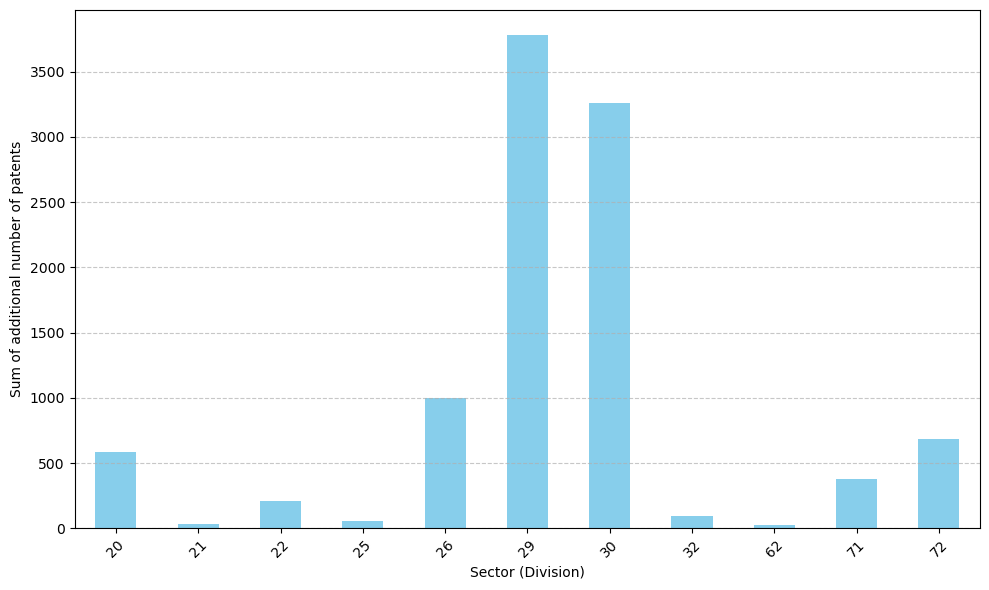

In [10]:
df_final = data_for_prediction.groupby('division')['delta_nb_brevets'].sum()
import matplotlib.pyplot as plt

# Créer un bar chart pour afficher la somme de delta_nb_brevets par secteur
plt.figure(figsize=(10, 6))
df_final.plot(kind='bar', color='skyblue')  # Utilisation d'un bar chart
plt.xlabel('Sector (Division)')
plt.ylabel('Sum of additional number of patents')
plt.xticks(rotation=45)  # Rotation des labels des secteurs pour la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter des lignes de grille
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()

In [11]:
# Calculer la somme de CIR et delta_nb_brevets par siren
sums_by_siren = data_for_prediction.groupby('siren')[['CIR', 'delta_nb_brevets']].sum()

# Afficher les résultats
sums_by_siren

,CIR,delta_nb_brevets
siren,,
300560588,0.692881,4.144335
302456199,4.251904,0.665507
304849094,13.202904,-0.762148
305151409,59.904000,6.528030
306926684,0.750000,-6.723109
...,...,...
871500229,0.098259,4.564976
897080289,23.620405,25.664956
950020180,0.541326,1.064960


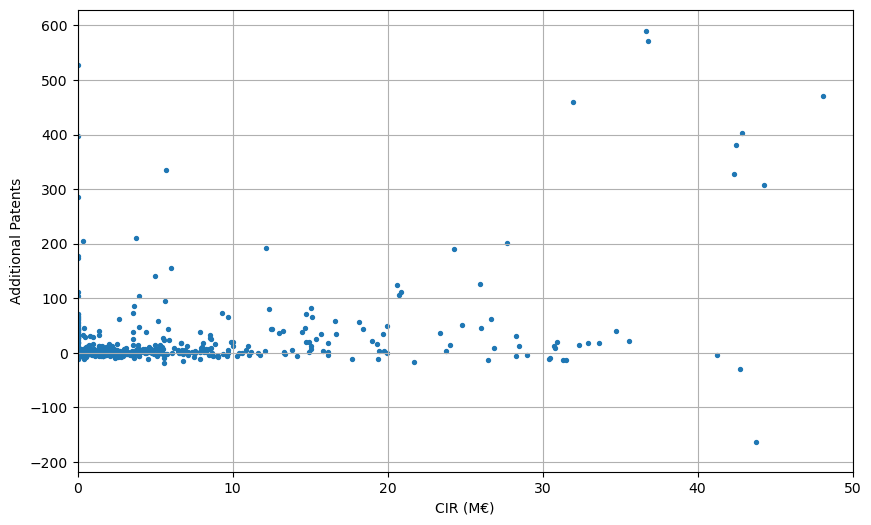

In [242]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_for_prediction['CIR'], data_for_prediction['delta_nb_brevets'], s=8)

plt.xlabel('CIR (M€)')
plt.ylabel('Additional Patents')
plt.xlim(0, 50)  # Limite pour l'axe des X
plt.grid(True)
plt.show()

In [243]:
data_for_prediction['brevets'].sum()

18656.0

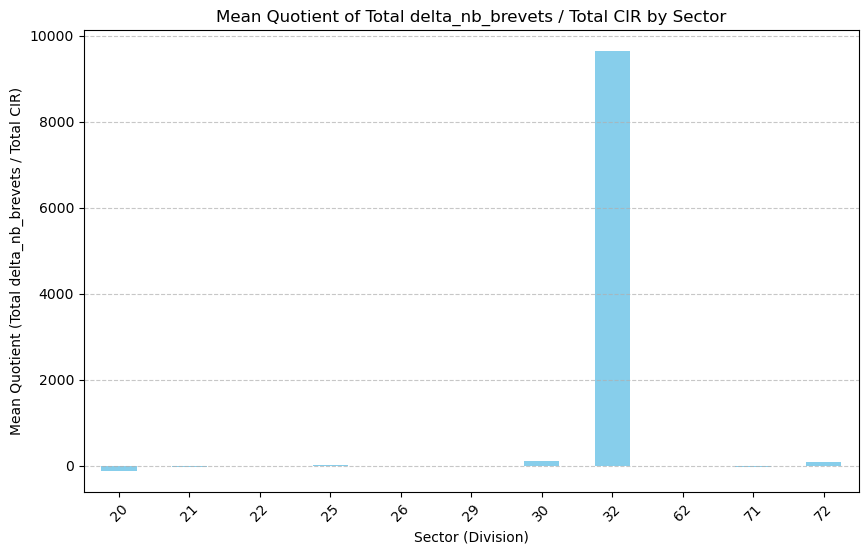

In [244]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels=32, errors='ignore')
# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels='32', errors='ignore')
# Étape 4 : Représenter la moyenne par secteur avec un bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mean_quotient_by_sector.plot(kind='bar', color='skyblue')
plt.title("Mean Quotient of Total delta_nb_brevets / Total CIR by Sector")
plt.xlabel("Sector (Division)")
plt.ylabel("Mean Quotient (Total delta_nb_brevets / Total CIR)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [245]:
import pandas as pd
from tabulate import tabulate  # Assurez-vous d'importer la fonction `tabulate`

# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = (sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR'])

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('division').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table of the mean per sector of additional patents for each million unit of CI")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table of the mean per sector of additional patents for each million unit of CI
+----------+---------------------+
| division |    mean_quotient    |
+----------+---------------------+
|    20    | -125.56448710068393 |
|    21    |  -16.4069500305987  |
|    22    | -3.491055033860284  |
|    25    |  9.721284718136921  |
|    26    | 0.1664102394979619  |
|    29    | -1.0550551409611035 |
|    30    | 112.22817355442078  |
|    32    |  9634.40418172179   |
|    62    | -1.5349347740298445 |
|    71    | -17.274226752100713 |
|    72    |  93.03107087271077  |
+----------+---------------------+


In [246]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first'),
    Id_ETI = ('idEti', 'first') # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('Id_ETI')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('Id_ETI').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table per size of company:")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table per size of company:
+--------+--------------------+
| Id_ETI |   mean_quotient    |
+--------+--------------------+
|   0    | 1619.3866350666465 |
|   1    |  -5.6308479251237  |
+--------+--------------------+


In [270]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit a Negative Binomial model
nb_model = smf.glm(
    formula='brevets ~ 1 + RetD * C(division, Treatment("72")) + C(annee) + C(idEti, Treatment("0")) + dateCreationUniteLegale',
    data=panel_238,
    family=sm.families.NegativeBinomial()
).fit()

# Display the summary of the model
print(nb_model.summary())


d:\Python\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                brevets   No. Observations:                 1175
Model:                            GLM   Df Residuals:                     1147
Model Family:        NegativeBinomial   Df Model:                           27
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2973.3
Date:                Thu, 21 Nov 2024   Deviance:                       2146.4
Time:                        17:36:12   Pearson chi2:                 4.24e+03
No. Iterations:                    33   Pseudo R-squ. (CS):             0.9153
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [272]:
# Criar uma nova coluna com os valores ajustados de RetD
panel_238['RetD_CF'] = panel_238['RetD'] - panel_238['CIR']

# Criar uma cópia do DataFrame original para predições
data_for_prediction = panel_238.copy()

# Substituir a coluna 'RetD' pelos valores de 'RetD_CF'
data_for_prediction['RetD'] = data_for_prediction['RetD_CF']

# Fazer previsões com o modelo ajustado
predictions = nb_model.predict(data_for_prediction)

# Adicionar as predições ao DataFrame
data_for_prediction['nb_brevets_CF'] = predictions

# Como o modelo binomial negativo não usa log-link diretamente como OLS,
# as predições já estão na escala original (não precisa aplicar np.exp)

# Ordenar os dados por 'siren' e 'annee' para exibição
data_for_prediction = data_for_prediction.sort_values(by=["siren", "annee"], ascending=True)

# Exibir o DataFrame ajustado com predições
pd.reset_option('display.max_rows')  # Resetar a exibição padrão
data_for_prediction


,index,siren,division,dateCreationUniteLegale,annee,brevets,CIR,idEti,RetD,RetD_CF,nb_brevets_CF
0,0,300560588,20,1900,2016,6,0.000000,1,0.000000,0.000000,5.254671
1,238,300560588,20,1900,2017,3,0.368934,1,0.860846,0.860846,3.426383
2,476,300560588,20,1900,2018,1,0.323947,1,0.755876,0.755876,3.127030
3,714,300560588,20,1900,2019,0,0.000000,1,0.000000,0.000000,2.629186
4,952,300560588,20,1900,2020,1,0.000000,1,0.000000,0.000000,2.431380
...,...,...,...,...,...,...,...,...,...,...,...
855,237,957503642,32,1957,2016,0,0.000000,1,0.000000,0.000000,2.264301
856,475,957503642,32,1957,2017,3,0.575471,1,1.342766,1.342766,1.944209
857,713,957503642,32,1957,2018,0,0.000000,1,0.000000,0.000000,1.330938
858,951,957503642,32,1957,2019,2,0.000000,1,0.000000,0.000000,1.132948


In [273]:
data_for_prediction ['delta_nb_brevets'] =-(data_for_prediction['nb_brevets_CF']- data_for_prediction['brevets'])

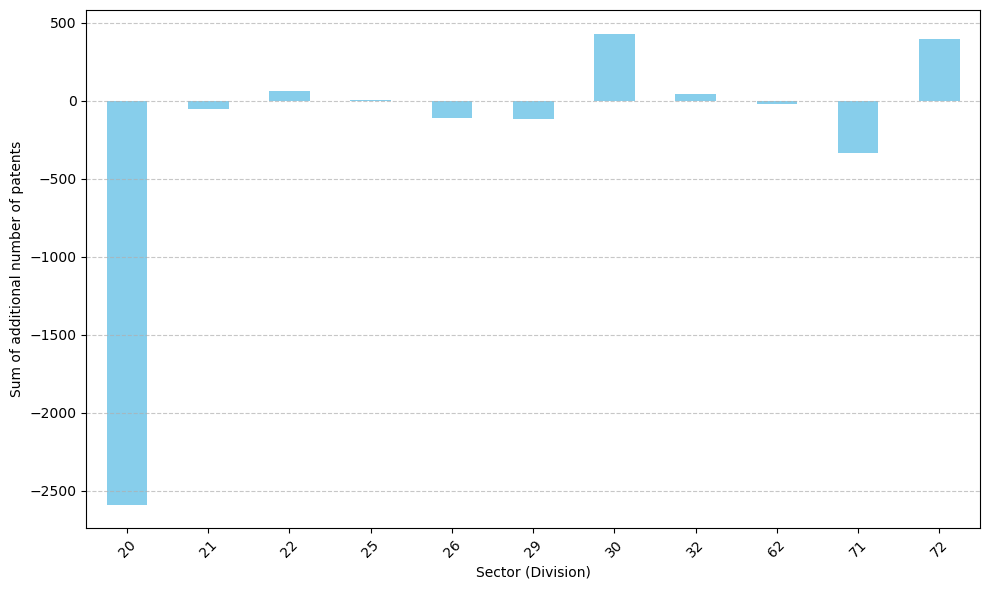

In [274]:
df_final = data_for_prediction.groupby('division')['delta_nb_brevets'].sum()
import matplotlib.pyplot as plt

# Créer un bar chart pour afficher la somme de delta_nb_brevets par secteur
plt.figure(figsize=(10, 6))
df_final.plot(kind='bar', color='skyblue')  # Utilisation d'un bar chart
plt.xlabel('Sector (Division)')
plt.ylabel('Sum of additional number of patents')
plt.xticks(rotation=45)  # Rotation des labels des secteurs pour la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter des lignes de grille
plt.tight_layout()  # Ajuster la disposition pour éviter le chevauchement
plt.show()

In [275]:
# Calculer la somme de CIR et delta_nb_brevets par siren
sums_by_siren = data_for_prediction.groupby('siren')[['CIR', 'delta_nb_brevets']].sum()

# Afficher les résultats
sums_by_siren

,CIR,delta_nb_brevets
siren,,
300560588,0.692881,-5.868650
302456199,4.251904,-1.534957
304849094,13.202904,-18.668147
305151409,59.904000,-0.673216
306926684,0.750000,-16.397135
...,...,...
871500229,0.098259,-0.880498
897080289,23.620405,14.586947
950020180,0.541326,-1.618931


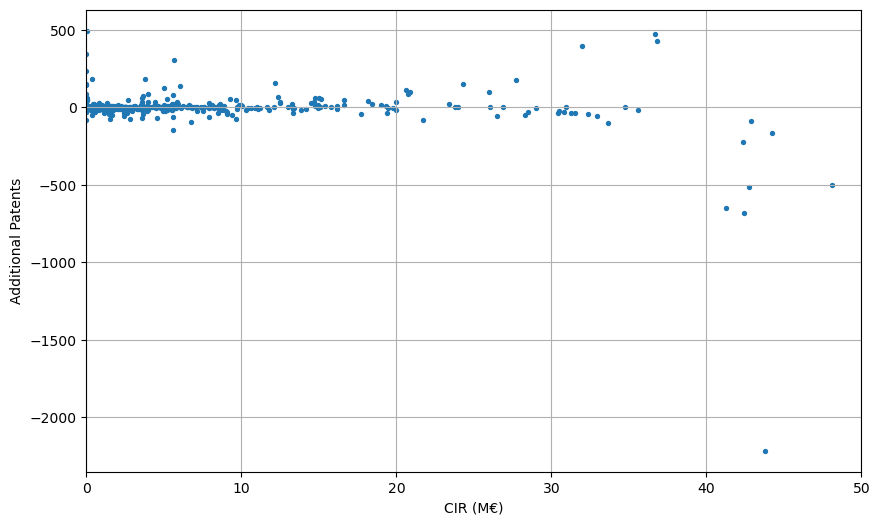

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_for_prediction['CIR'], data_for_prediction['delta_nb_brevets'], s=8)

plt.xlabel('CIR (M€)')
plt.ylabel('Additional Patents')
plt.xlim(0, 50)  # Limite pour l'axe des X
plt.grid(True)
plt.show()

In [277]:
data_for_prediction['brevets'].sum()

18074

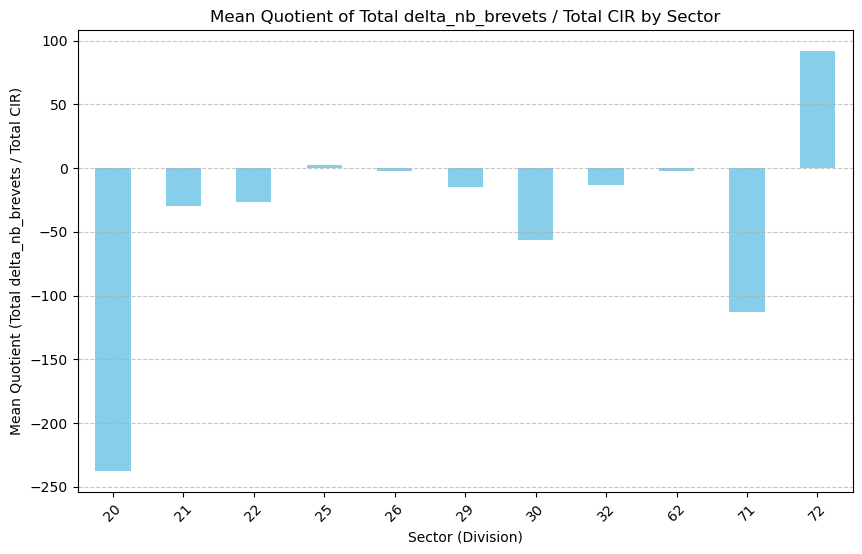

In [278]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels=32, errors='ignore')
# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()
#mean_quotient_by_sector_filtered = mean_quotient_by_sector.drop(labels='32', errors='ignore')
# Étape 4 : Représenter la moyenne par secteur avec un bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mean_quotient_by_sector.plot(kind='bar', color='skyblue')
plt.title("Mean Quotient of Total delta_nb_brevets / Total CIR by Sector")
plt.xlabel("Sector (Division)")
plt.ylabel("Mean Quotient (Total delta_nb_brevets / Total CIR)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [279]:
import pandas as pd
from tabulate import tabulate  # Assurez-vous d'importer la fonction `tabulate`

# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first')  # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = (sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR'])

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('division')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('division').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table of the mean per sector of additional patents for each million unit of CI")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table of the mean per sector of additional patents for each million unit of CI
+----------+---------------------+
| division |    mean_quotient    |
+----------+---------------------+
|    20    | -237.75111294593427 |
|    21    | -29.618020082422326 |
|    22    | -26.42186273327405  |
|    25    | 2.1395986814783567  |
|    26    |  -2.60784421213318  |
|    29    | -15.152044552674194 |
|    30    | -56.66540456547357  |
|    32    | -13.561276307979782 |
|    62    | -2.3681021005901908 |
|    71    | -113.14695729746816 |
|    72    |  91.68688954428377  |
+----------+---------------------+


In [280]:
# Étape 1 : Calculer la somme de delta_nb_brevets et CIR par entreprise (siren)
sums_by_siren = data_for_prediction.groupby('siren').agg(
    total_delta_nb_brevets=('delta_nb_brevets', 'sum'),
    total_CIR=('CIR', 'sum'),
    division=('division', 'first'),
    Id_ETI = ('idEti', 'first') # on garde la division associée au siren
)

# Étape 2 : Calculer le rapport des sommes pour chaque entreprise
sums_by_siren['quotient'] = sums_by_siren['total_delta_nb_brevets'] / sums_by_siren['total_CIR']

# Étape 3 : Calculer la moyenne du quotient par secteur (division)
mean_quotient_by_sector = sums_by_siren.groupby('Id_ETI')['quotient'].mean()

# Créer un tableau avec la somme des CIR et des brevets par secteur
sector_summary = sums_by_siren.groupby('Id_ETI').agg(
    mean_quotient=('quotient', 'mean')
)

# Affichage du tableau avec les résultats
# Convertir le DataFrame en format tableau lisible
print("\nSummary Table per size of company:")
print(tabulate(sector_summary, headers='keys', tablefmt='pretty', showindex=True))



Summary Table per size of company:
+--------+--------------------+
| Id_ETI |   mean_quotient    |
+--------+--------------------+
|   0    | -89.41831440228376 |
|   1    | -38.53661700780114 |
+--------+--------------------+
